# Plots of the (sub-exponential) CGF

In [1]:
import os.path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import comparecast as cc

In [2]:
# Setup
cc.set_theme()
rng = np.random.default_rng(20221004)

n_points = 1000
plots_dir = os.path.join(".", "plots", "cgfs")
save_plots = True
savefig_dpi = 300

if save_plots:
    os.makedirs(plots_dir, exist_ok=True)

## Illustration: $\psi_N$ vs. $\psi_E$

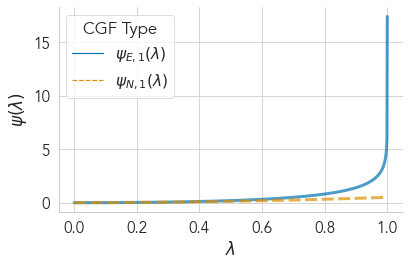

In [3]:
"""
CGF Illustration
"""

c = 1.0
lambdas = np.linspace(0, c - 1e-8, n_points)

df = pd.DataFrame({
    r"$\lambda$": lambdas,
    r"$\psi_{E,1}(\lambda)$": cc.get_cgf("exponential")(lambdas, c=c),
    r"$\psi_{N,1}(\lambda)$": cc.get_cgf("gaussian")(lambdas, c=c),
    #r"$\psi_{G,1}(\lambda)$": cc.get_cgf("gamma")(lambdas, c=c),
}).melt([r"$\lambda$"], var_name="CGF Type", value_name=r"$\psi(\lambda)$")
fg = sns.relplot(
    x=r"$\lambda$", y=r"$\psi(\lambda)$", 
    hue="CGF Type", style="CGF Type",
    height=4, aspect=1.5, linewidth=3, alpha=0.7,
    kind="line", data=df,
    facet_kws={"legend_out": False},
)
#fg.ax.set(yscale="log")
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "cgfs_e_vs_n.pdf"), dpi=savefig_dpi)
None

## Strong Convexity of $\psi_{E,c}(\lambda)$ as a Function of $c$

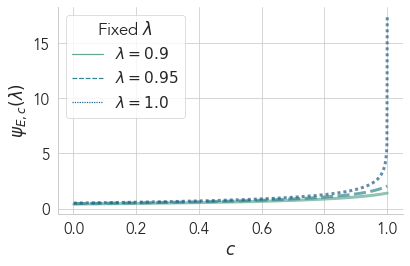

In [4]:
lambda_ = 1.0
cs = np.linspace(1/n_points, 1.0 / lambda_ - 1e-8, n_points)

df = pd.DataFrame({
    r"$c$": cs,
    r"$\lambda=0.9$": cc.get_cgf("exponential")(0.9, c=cs),
    r"$\lambda=0.95$": cc.get_cgf("exponential")(0.95, c=cs),
    r"$\lambda=1.0$": cc.get_cgf("exponential")(lambda_, c=cs),
}).melt([r"$c$"], var_name=r"Fixed $\lambda$", value_name=r"$\psi_{E,c}(\lambda)$")
fg = sns.relplot(
    x=r"$c$", y=r"$\psi_{E,c}(\lambda)$", 
    hue=r"Fixed $\lambda$", style=r"Fixed $\lambda$",
    height=4, aspect=1.5, linewidth=3, alpha=0.7,
    kind="line", data=df,
    palette="crest", facet_kws={"legend_out": False},
)
#fg.ax.set(yscale="log")
plt.tight_layout()
plt.savefig(os.path.join(plots_dir, "cgfs_by_c.pdf"), dpi=savefig_dpi)
None